# Analysis

## Part 1: Data and Models

### Introduction

<p>
The Nenana Ice Classic is an annual guessing game and fundraiser held in Nenana, Alaska.
Each year you can bet on the day and time the river ice in the Tanana River will break apart along the waterfront of Nenana. 

A tripod is constructed on the ice during the first weekend in March. This tripod is connected to a clock via a pulley system on the shore. When the ice starts moving and the tripod drifts 100 feet downriver, the line tightens and triggers the clock to stop, marking the official break-up time. The record earliest break-up was in 2019 (April 14). The latest was in 1964 (May 20).

You can buy a ticket for $3 and place a bet between Feb 1 and April 5. Our goal is to create a model to predict the ice break-up and WIN!!!

Visit the [website](nenanaakiceclassic.com) for more information, or to view a live webcam of the river. 
In addition to the official website, you can read more about the competition here:
- [Blogpost from a local](https://rivahman.blogspot.com/2010/04/nenana-ice-classic.html)
- [More on the clock mechanism](https://www.adn.com/opinions/2017/05/01/this-antique-engineering-marvel-records-spring-breakup-in-alaska-like-clockwork/)
<p/>

![Tripod](https://files.mude.citg.tudelft.nl/tripod.png)

[image source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FNenana_Ice_Classic&psig=AOvVaw3tnHXKo9OPR3-LQdijw42w&ust=1694170505343000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCICe9omrmIEDFQAAAAAdAAAAABAE)


### System Components
The setup of the tripod and clock directly determines the definition of ice break-up: a rope is attached from the tripod to a clock on the riverbank. When the rope is pulled tight it stops the clock. This time is used to determine the winning guess of the breakup day and time (down to the minute). A diagram of the setup is shown below.

![setup](https://files.mude.citg.tudelft.nl/setup.png)

*Diagram by Robert Lanzafame*

### Available data and scale
When building a model to predict the breakup time, it is essential to consider the scale of the data available. As a general rule, larger scale data shows overall trends but may be too generic; smaller-scale data has more variation as the data is not smoothed by averaged effects.

The **local scale** concerns itself with the data collected in Nenana itself or immediately around the Tanana River at the town. It's the most fine-grained and directly related to the tripod and ice. Examples include the local river discharge and ice thickness (although this is extremely difficult to measure).

Next, the **watershed scale** includes data pertaining to the Tanana River watershed, including upstream areas that feed into the Tanana. This includes regions like the Alaska Range, tributaries (including Nenana!), and snowfields. An example is the annual snowpack and precipitation rates in the Alaska Range.

The **regional data** covers a larger area than local or watershed scale — for example, Interior Alaska or the entire state. It captures trends affecting multiple towns, rivers, and ecosystems. We can, for instance, look at the sun hours of the region to estimate the amount of solar radiation. 

The **global scale** refers to planet-wide systems that can affect Alaska indirectly, including the little town of Nenana. Average global temperatures is perhaps the most well known measure for this. And we have indeed seen a direct correlation between the average global temperature and ice breakup date!

Below is a table showing some examples of data at the scales discussed.

![data](https://files.mude.citg.tudelft.nl/data.png "data")

Data Sources: [USGC data](https://waterdata.usgs.gov/nwis/dvstat), [NOAA data](https://www.ncdc.noaa.gov), [CRU data](http://www.cru.uea.ac.uk/data/), [BerkeleyEarth](https://berkeleyearth.org/data/)

When building a model, you should consider using different scales. Long-term global and regional trends give you the “big picture.” While the watershed and local scale tells you how much gives you information that is more precisely related to the ice breakage.

<p>

### Example Models
These models have been arranged in order of large to small scale and can be considered as one of many tools that could be used to inform your prediction for break-up day and time in the Nenana Ice Classic. Each model may have more than one "sub-model" that you can consider.

<table>
    <tr>
        <td>Model 1</td>
        <td>From a global climate model considering ENSO (sea-surface temperatures in the South Pacific Ocean) and Alaska temperatures (a) determine the heat exchange of the system which leads to (b) precipitation (c) river discharge and (d) ice melting rate.</td>
    </tr>
    <tr>
        <td>Model 2</td>
        <td>Consider the heat of the sun, cloud coverage and the snow/ice cover at a regional scale (whole Alaska for instance) to (a) determine the heat absorption of the ground and/or snow/ice. Then (b) determine the rate of ice melting in the river from the river temperature and discharge due to snowmelt and rainfall.</td>
    </tr>
    <tr>
        <td>Model 3</td>
        <td>Consider river water discharge and river water temperature (a) to determine ice melting rate in the river within 1 km upstream of Nenana, which is used to (b) predict deformation and movement of ice downstream and (c) the tension in the rope until it reaches a point that the clock is stopped.</td>
    </tr>
    <tr>
        <td>Model 4</td>
        <td>Given a velocity of ice moving downstream (slowly) as it melts and deforms (as a plastic continuum), (b) calculate the rope tension as in model 3 above. The velocity is derived from (a) past measurements that are represented with a probability distribution.</td>
    </tr>
</table>

<p/>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 1.1:}$
    
Answer the questions in the report under **Part 1** with reference to the example models. You don't need to make changes to the notebook for this task
    
</p>
</div>

## Part 2: Model vs Model
In this part of the assignment we will fit two models to historic ice break-up dates and reflect on their performance.

### Exploring the data

The data we are working with represents the number of days since the new year that it took for the ice in a river to break apart. The current record goes from 1917 to 2025, which is in total 109 years of measurements. The data in this notebook has been pre-prepared for you to be in the correct format, the original data can be downloaded [here](https://daacdata.apps.nsidc.org/pub/DATASETS/nsidc0064_nenana_ice_classic_v2/).

Before starting, run the cell below to import the required packages.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import scipy.optimize as opt

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.1:}$
Import the data by running the cell below. To get more used to reading code, try to explain to each other what is happening in the code. 
    
</p>
</div>

In [27]:
# load data
data = np.loadtxt('data/days.csv', delimiter=';', skiprows=1)
print(data[0:10])

# More information about the data
shape_of_data = np.shape(data)
print('Shape of data:',shape_of_data)

mean = np.mean(data[:,1])
std = np.std(data[:,1])
print(f'Mean: {mean:.3f}\n\
Standard deviation: {std:.3f}')

[[1917.  119.]
 [1918.  130.]
 [1919.  122.]
 [1920.  130.]
 [1921.  130.]
 [1922.  131.]
 [1923.  128.]
 [1924.  130.]
 [1925.  126.]
 [1926.  115.]]
Shape of data: (109, 2)
Mean: 122.596
Standard deviation: 6.454


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 2.1:}$

We import the dataset by using the numpy function loadtxt. Inside the function we specify the following:
- We read the file named `data/days.csv`. 
- We set the delimiter between columns as `delimeter=';'`
- We specify to skip the first row (which contains the header of the columns) as `skiprows=1`.

We also print the first 10 elements of the array.

Then, we find the shape of the data. The result is a [109,2] array, i.e., a matrix with 109 rows and 2 columns. The first column contains the year of record, while the second one contains the measured date.

We can also compute the mean (122.6) and the standard deviation (6.5) of the variable of interest (second column). This second column contains the day of the year. 

</p></div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.2:}$

Plot the data in a scatterplot using the code below. To get more used to reading code, try to explain to each other what is happening in the code. 

Take note of any interesting trends you might see.
    
</p>
</div>

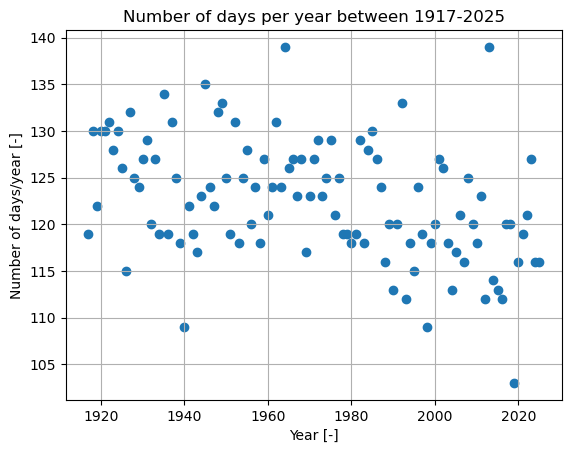

In [28]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1], label='Measured data')
plt.xlabel('Year [-]')
plt.ylabel('Number of days/year [-]')
plt.title(f'Number of days per year between {data[0,0]:.0f}-{data[-1,0]:.0f}')
plt.grid()

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 2.2:}$
The code provided plots the data.
- `plt.scatter` is used to create a scatter plot. On the x-axis, we plot all elements in column 1 of the data, i.e., the year. On the y-axis, we plot all elements in column 2, i.e., the day of ice breakup.
- `plt.xlabel` and `plt.ylabel` are used to add labels to the axes.
- `plt.title` is used to add the title. Note how the title automatically grabs the year of the first and last entry from the data.
- `plt.grid` adds the grid to the plot.


The day usually falls between 135 and 110 days after the new year every year.
There seems to be a slight downward trend of the days it takes the ice to melt.

</p></div>

### Model 1
Once we have had a look at the data and know some basic information about it, we are going to create a simple model to predict the day of ice breakup. 
In our first model, we will assume a linear relationship between the variables. Thus, we will fit a **linear model** using linear regression. 

The form of the linear regression model is: 

$days=m⋅years+q$

Where $m$ represents the slope of the line, and $q$ is the intercept. 

You may recall from your earlier studies that the process of regression involves minimising the difference between your data points and your predicted line. In the case of linear regression this is the coefficient of determination $(R^2)$, which you can read more about in the book and is a goodness of fit metric.

For this, we will use the `linregress` function from the `scipy.stats` library. Note that this has been imported earlier in this notebook.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.3:}$

Run the regression using the code below. To get more used to reading code, try to explain to each other what is happening in the code.
</p>
</div>

In [29]:
# regression
regression = sci.linregress(data[:,0], data[:,1])

r_sq = regression.rvalue**2
q = regression.intercept 
m = regression.slope 

print(f'Coefficient of determination R^2 = {r_sq:.3f}')
print(f'Intercept q = {q:.3f} \nSlope m = {m:.3f}')


Coefficient of determination R^2 = 0.164
Intercept q = 286.435 
Slope m = -0.083


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 2.3:}$
The code provided performs the regression and also fetches the resulting parameters for us to print out.
- `sci.linregress` performs our regression, with x values and y values as input. Recall that this is equivalent to the first column and second column of the data.
- The next three lines fetches the values of the `rvalue`, intercept and slope variables within the final regression. You can read more about how this works [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

</p></div>

Another way to check the goodness of fit is to see how well the predicted values fit the actual values. We can plot these against each other.

The code below plots the results. 

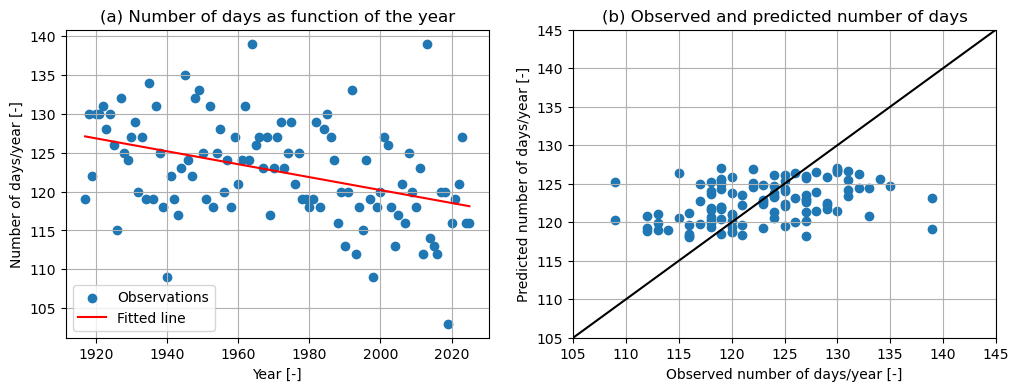

In [30]:
# this code calculates the line we plot for the regression
def calculate_line(x, m, q):
    y = m * x + q
    return y

line = calculate_line(data[:,0], m, q)

fig, axes = plt.subplots(1, 2,figsize = (12, 4))

# this code plots the data with the fitted line
axes[0].scatter(data[:,0], data[:,1], label = 'Observations')
axes[0].plot(data[:,0], line, color='r', label='Fitted line')
axes[0].set_ylabel('Number of days/year [-]')
axes[0].set_xlabel('Year [-]')
axes[0].grid()
axes[0].legend()
axes[0].set_title('(a) Number of days as function of the year')

# this code plots the values of the regression model against the actual values.
axes[1].plot([105, 145],[105, 145], color = 'k')
axes[1].set_xlim([105, 145])
axes[1].set_ylim([105, 145])
axes[1].set_ylabel('Predicted number of days/year [-]')
axes[1].set_xlabel('Observed number of days/year [-]')
axes[1].grid()
axes[1].set_title('(b) Observed and predicted number of days');axes[1].scatter(data[:,1], line)


One way of assessing the uncertainty around the predictions of a model are confidence intervals. These give us insight into the precision of the predictions by transforming them into probabilities. The 95% confidence interval shows the range of values within which observation would be with a probability of 95% (a significance value of 0.05). You will learn more about confidence intervals later in the course. 

**Note:**
**The confidence intervals as computed here are based on a simplification. Later in the course, you will see how to compute the confidence intervals correctly. For now, they are just a means for discussion**


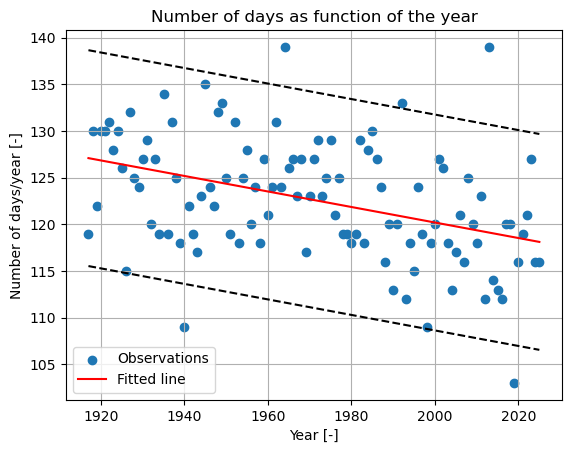

In [31]:
# calculate the lines of the intervals
sd_error = (data[:,1] - line).std()
k = sci.norm.ppf(1-0.05/2) * sd_error

ci_low = line - k
ci_up = line + k

# plot
plt.scatter(data[:,0], data[:,1], label = 'Observations')
plt.plot(data[:,0], line, color='r', label='Fitted line')
plt.plot(data[:,0], ci_low, '--k')
plt.plot(data[:,0], ci_up, '--k')
plt.ylabel('Number of days/year [-]')
plt.xlabel('Year [-]')
plt.grid()
plt.legend()
plt.title('Number of days as function of the year');

### Model 2

As you may have seen, the linear model does not describe the data very well. Let's try with one which is slightly more complicated: a non-linear model!

In this section, we will analyze the fitting of a quadratic model. This model is given as 

$days=A*year^2+B*year+C$

Where $A$ and $B$ are polynomial coefficients.

You do not need to worry about the implementation of code for this right now. We will again make use of the `scipy.optimize` library, which contains the `curve_fit` function.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.4:}$

Run the model fitting using the code below. Then, plot the results using the next cell of code. 
</p>
</div>

In [32]:
# fitting the quadratic model

def parabola(x, a, b, c):
    y = a * x**2 + b * x + c
    return y

popt_parabola, pcov_parabola = opt.curve_fit(parabola, data[:,0], data[:,1])

fitted_parabola = parabola(data[:,0], *popt_parabola)

print(f'Optimal estimation for parameters:\n\
a = {popt_parabola[0]:.3e}, b = {popt_parabola[1]:.3f}, c = {popt_parabola[2]:.3f}\n')

print(f'Covariance matrix for parameters:\n\
Sigma = {pcov_parabola}')


Optimal estimation for parameters:
a = -8.006e-04, b = 3.073, c = -2822.804

Covariance matrix for parameters:
Sigma = [[ 4.12926159e-07 -1.62775495e-03  1.60374371e+00]
 [-1.62775495e-03  6.41693709e+00 -6.32260227e+03]
 [ 1.60374371e+00 -6.32260227e+03  6.22997227e+06]]


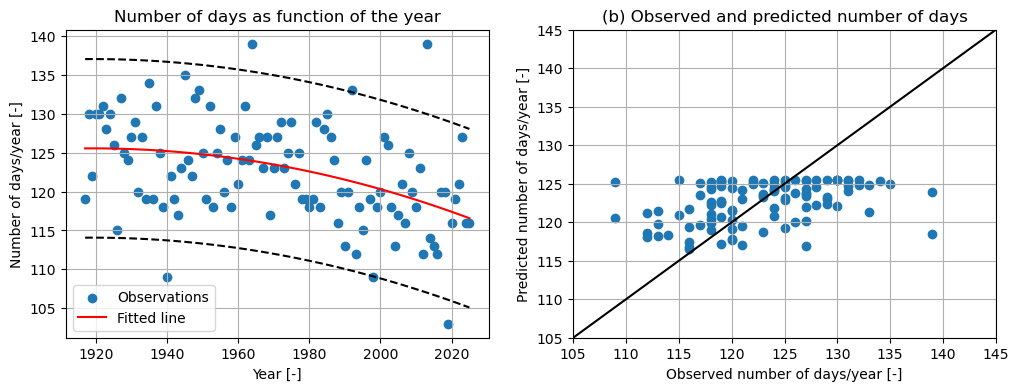

In [38]:
# calculate confidence intervals 95%
sd_error = (data[:,1] - fitted_parabola).std()
k = sci.norm.ppf(1-0.05/2) * sd_error

ci_low_2 = fitted_parabola - k
ci_up_2 = fitted_parabola + k

fig, axes = plt.subplots(1, 2,figsize = (12, 4))

#plot
axes[0].scatter(data[:,0], data[:,1], label = 'Observations')
axes[0].plot(data[:,0], fitted_parabola, color='r', label='Fitted line')
axes[0].plot(data[:,0], ci_low_2, '--k')
axes[0].plot(data[:,0], ci_up_2, '--k')
axes[0].set_ylabel('Number of days/year [-]')
axes[0].set_xlabel('Year [-]')
axes[0].grid()
axes[0].legend()
axes[0].set_title('Number of days as function of the year')

# this code plots the values of the regression model against the actual values.
axes[1].plot([105, 145],[105, 145], color = 'k')
axes[1].set_xlim([105, 145])
axes[1].set_ylim([105, 145])
axes[1].set_ylabel('Predicted number of days/year [-]')
axes[1].set_xlabel('Observed number of days/year [-]')
axes[1].grid()
axes[1].set_title('(b) Observed and predicted number of days');axes[1].scatter(data[:,1], fitted_parabola)

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 2.5:}$
    
After running the two models above, answer **Part 2** of the report.
    
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 2.5:}$

See report solutions

</p></div>

## Part 3: More Models

In this part we look at more approaches to modelling the ice breakage day. 
We have included several different approaches to modelling sea ice, with varying degrees of scale and complexity.
As you will see, there are a multitude of ways to model this one seemingly specific event. All of the models have their own merits and limitations. None of the models are 'wrong' or 'right', it depends on how you choose to approach the problem and what aspects of ice breakage you want to look at. 

Below we give a short introduction to various approaches to modelling. Sources for further reading are linked. As the introductions are very superficial, we encourage you to follow the provided links to look through the source materials! 




<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.1:}$
    
Consider the information given and linked below, answer **Part 3** of the report. You may want to split the readings between your group members and come together to discuss. 
    
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

$\text{Solution 3.1:}$

See report solutions

</p></div>

### Ice Thickness
To model the ice growth, you could to use the classical [Stefan's Problem](https://files.mude.citg.tudelft.nl/Stefan's_Problem.pdf), which aims to determine how an ice layer grows as a function of time.

### Breakage Mechanisms
Another approach is to determine what breakage mechanism the ice might undergo. For instance [Beltaos(2003)](https://files.mude.citg.tudelft.nl/Beltaos_2003.pdf) shows in which conditions ice might break mechanically, if the river rises rapidly, or thermally, if it does not. [Beltaos(1984)](https://files.mude.citg.tudelft.nl/Beltaos_1984.pdf) introduces a conceptual model of ice breakup focusing on the transverse breakup of ice.

### Predictions Using Machine Learning
The following Bachelor theses presents some approaches to modelling the ice breakage date using historical data. 

In [De Wit(2022)](https://files.mude.citg.tudelft.nl/DeWit_2022.pdf) various data pertaining to climate data and ice breakage dates are used to train a simple neural network to create a forecasting model. [Terwogt(2021)](https://files.mude.citg.tudelft.nl/Terwogt_2021.pdf) implemented a random forest model to formulate the relationship and [van Asselt(2020)](https://files.mude.citg.tudelft.nl/vaAsselt_2020.pdf) formulated a multilinear regression model to find the relationship between breakage date and environmental variables. 


> By Jialei Ding and Robert Lanzafame, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html).